In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
conn = sqlite3.connect('data_clean_1.db')

In [24]:
pd.read_sql("select name from sqlite_master where type='table'",conn)

,name
0,students_performance_knn
1,students_performance_mv
2,wine_quality


In [4]:
spknn= pd.read_sql("select * from students_performance_knn",conn)

In [15]:
conn.close()

In [5]:
spknn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        975 non-null    object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
spknn.dropna(inplace=True,axis=0)

In [7]:
spknn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        975 non-null    int64 
 1   gender                       975 non-null    object
 2   race/ethnicity               975 non-null    object
 3   parental level of education  975 non-null    object
 4   lunch                        975 non-null    object
 5   test preparation course      975 non-null    object
 6   math score                   975 non-null    int64 
 7   reading score                975 non-null    int64 
 8   writing score                975 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 76.2+ KB


In [8]:
spknn.head(7)

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
5,5,female,group B,associate's degree,standard,none,71,83,78
7,7,male,group B,some college,free/reduced,none,40,43,39


In [9]:
spknn.drop(columns='index',axis=1,inplace=True)

In [10]:
spknn.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
spknn.describe()

,math score,reading score,writing score
count,975.000000,975.000000,975.000000
mean,66.058462,69.177436,68.062564
std,15.144196,14.616111,15.182030
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,76.500000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [12]:
spknn[spknn['math score']<30].shape

(14, 8)

In [13]:
gender = list(spknn['gender'].value_counts())

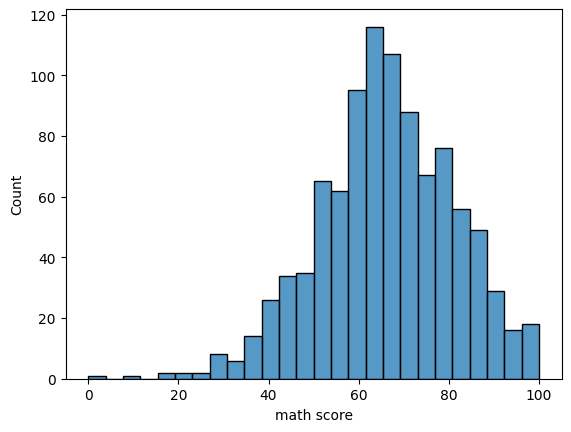

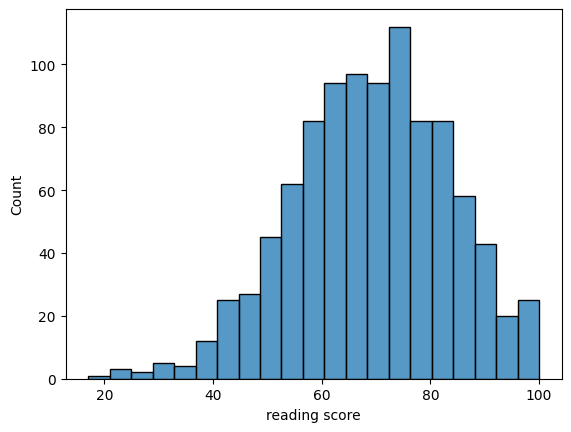

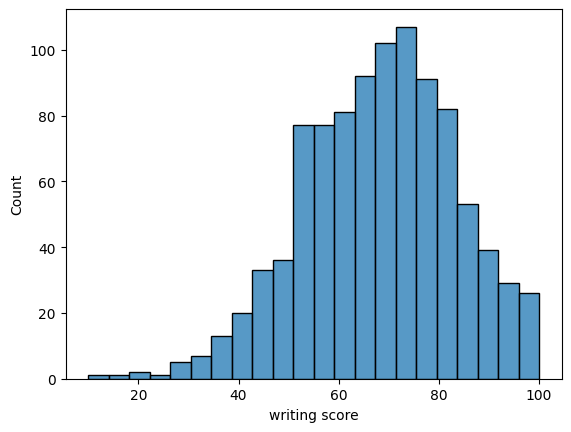

In [14]:
sns.histplot(spknn['math score'])
plt.show()
sns.histplot(spknn['reading score'])
plt.show()
sns.histplot(spknn['writing score'])
plt.show()

In [28]:
list(spknn['parental level of education'].value_counts())

[217, 216, 192, 177, 115, 58]

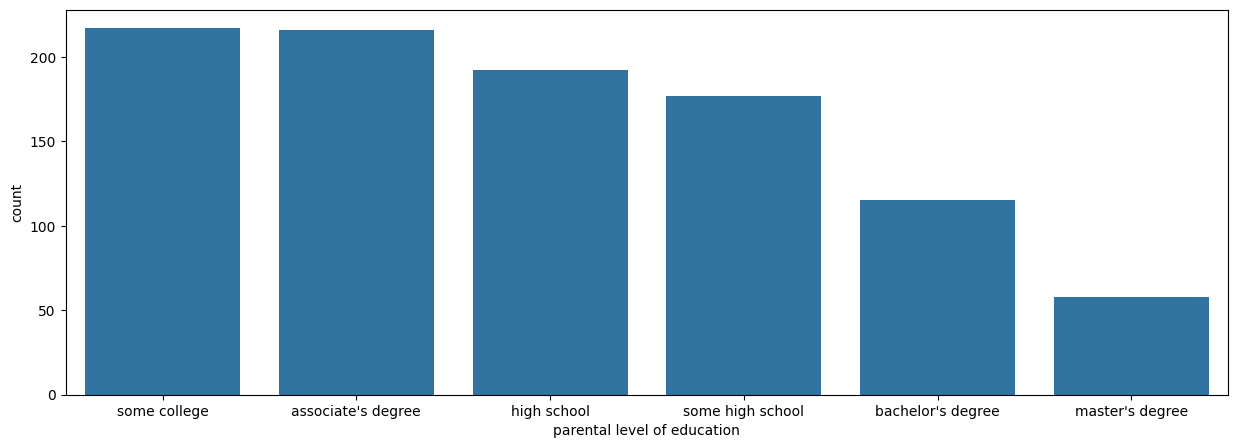

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(spknn['parental level of education'].value_counts())
plt.show()

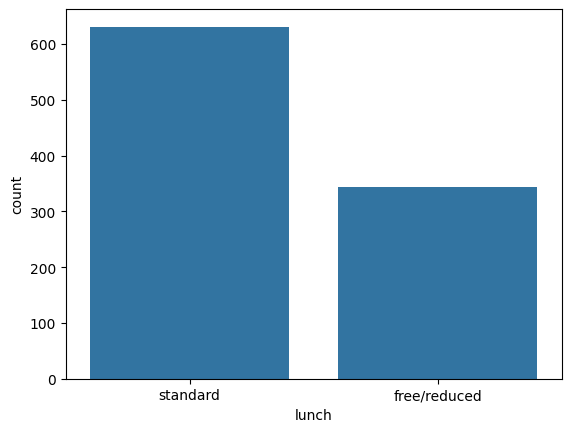

In [19]:
sns.barplot(spknn['lunch'].value_counts())
plt.show()

In [20]:
spknn.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='race/ethnicity', ylabel='Count'>

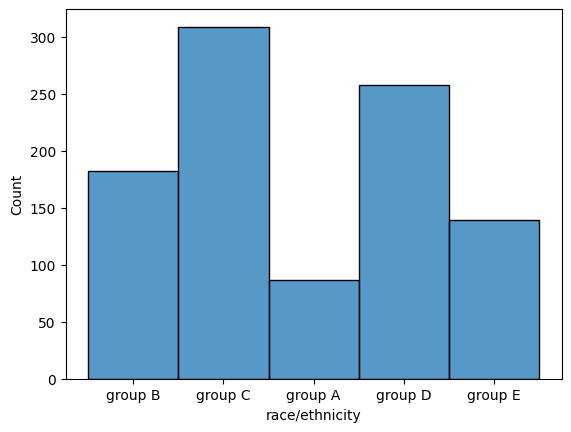

In [33]:
sns.histplot(spknn['race/ethnicity'])

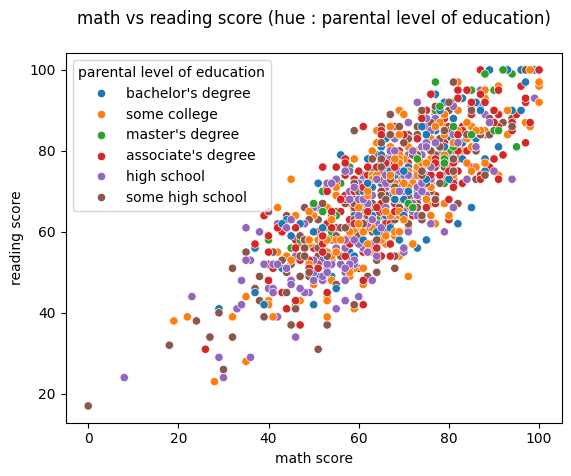

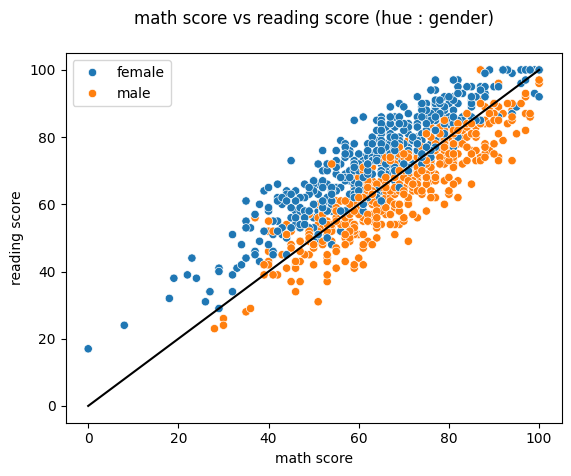

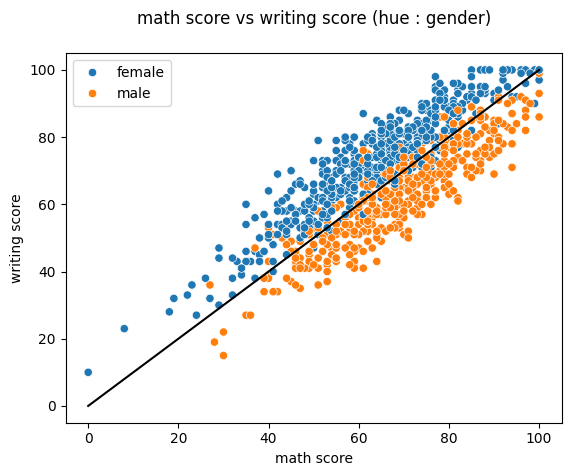

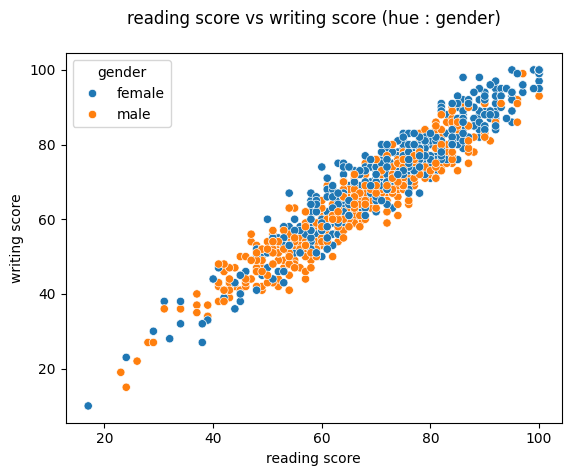

In [63]:
plt.title('math vs reading score (hue : parental level of education)\n')
sns.scatterplot(x='math score',y='reading score',hue='parental level of education',data=spknn)
plt.show()

plt.title('math score vs reading score (hue : gender)\n')
sns.scatterplot(x='math score',y='reading score',hue='gender',data=spknn)
sns.lineplot(x=[0,100],y=[0,100],c='k')
plt.show()

plt.title('math score vs writing score (hue : gender)\n')
sns.scatterplot(x='math score',y='writing score',hue='gender',data=spknn)
sns.lineplot(x=[0,100],y=[0,100],c='k')
plt.show()

plt.title('reading score vs writing score (hue : gender)\n')
sns.scatterplot(x='reading score',y='writing score',hue='gender',data=spknn)
plt.show()

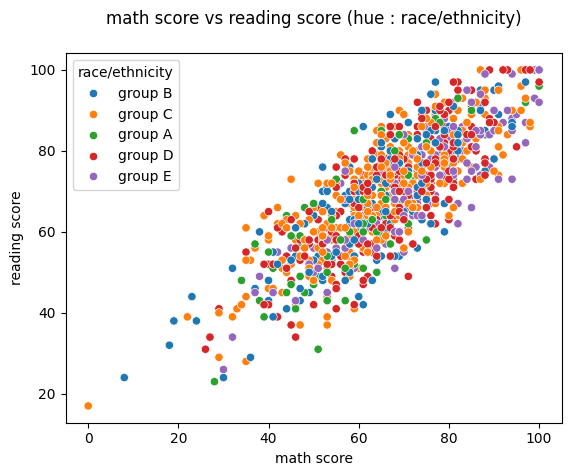

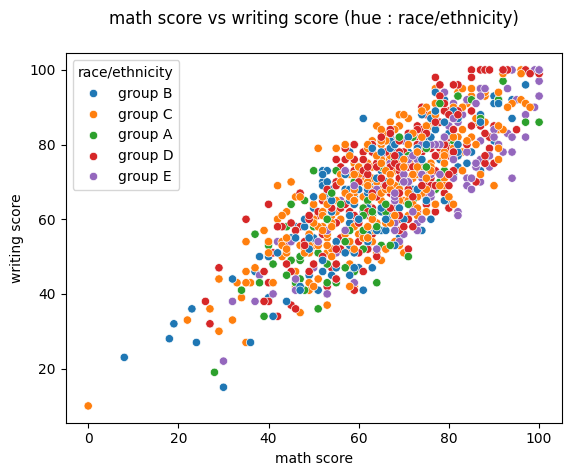

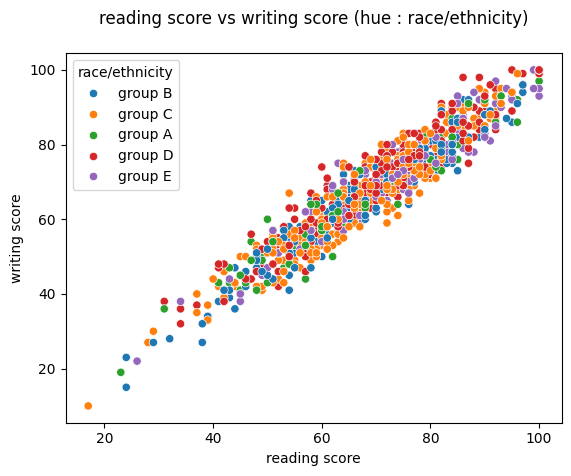

In [65]:
plt.title('math score vs reading score (hue : race/ethnicity)\n')
sns.scatterplot(x='math score',y='reading score',hue='race/ethnicity',data=spknn)

plt.show()

plt.title('math score vs writing score (hue : race/ethnicity)\n')
sns.scatterplot(x='math score',y='writing score',hue='race/ethnicity',data=spknn)
plt.show()

plt.title('reading score vs writing score (hue : race/ethnicity)\n')
sns.scatterplot(x='reading score',y='writing score',hue='race/ethnicity',data=spknn)
plt.show()

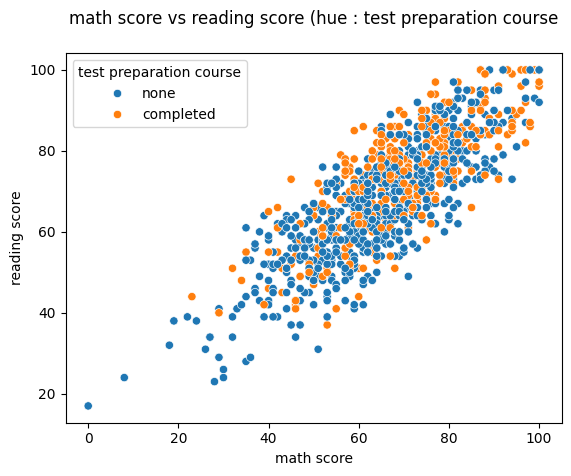

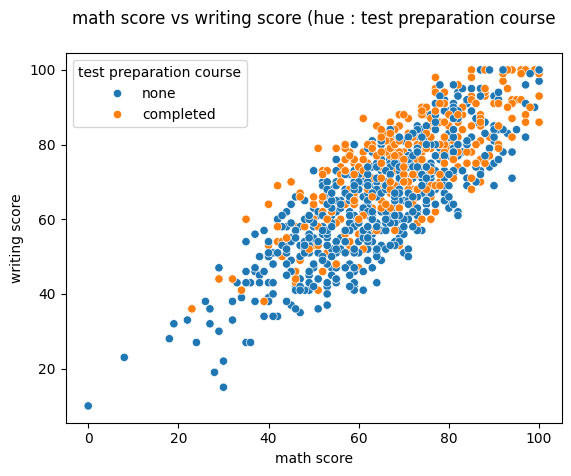

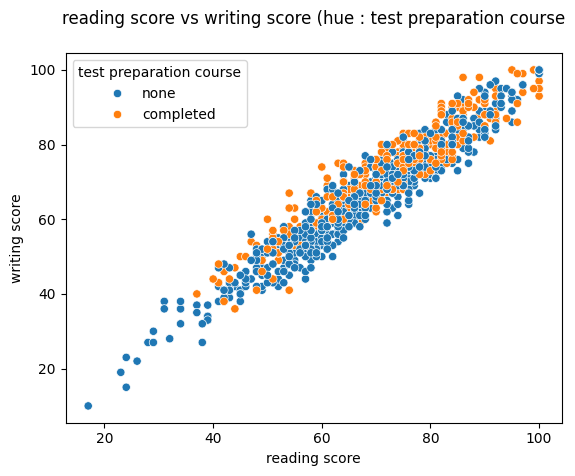

In [66]:
plt.title('math score vs reading score (hue : test preparation course\n')
sns.scatterplot(x='math score',y='reading score',hue='test preparation course',data=spknn)

plt.show()

plt.title('math score vs writing score (hue : test preparation course\n')
sns.scatterplot(x='math score',y='writing score',hue='test preparation course',data=spknn)
plt.show()

plt.title('reading score vs writing score (hue : test preparation course\n')
sns.scatterplot(x='reading score',y='writing score',hue='test preparation course',data=spknn)
plt.show()